# Heart Disease Presence Dataset

## Attribute Info:
    1) Age 
    2) Sex
    3) Chest Pain
    4) Resting Blood Pressure
    5) Serum Cholestrol
    6) Fasting Blood Sugar
    7) Resting electrocardiographic results
    8) Maximum heart rate achieved
    9) Exercise induced angina
    10) ST depression induced by exercise relative to rest
    11) The slope of the peak exercise ST segment
    12) Number of major vessels (0-3) 
    13) 3 = normal; 6 = fixed defect; 7 = reversable defect
    14) Target - 1 or 0

In [1]:
import numpy as np
import thinkplot
import thinkstats2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Outlier Removal

In [6]:
df1 = df.copy()
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df1 = df1[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


(228, 14)

In [7]:
df1.var()

age           85.174743
sex            0.220187
cp             1.040788
trestbps     235.596163
chol        1965.133530
fbs            0.000000
restecg        0.266385
thalach      505.933380
exang          0.217018
oldpeak        1.072099
slope          0.345680
ca             0.488504
thal           0.313935
target         0.244841
dtype: float64

In [8]:
df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [9]:
df.std()

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

### Exploratory Data Analysis

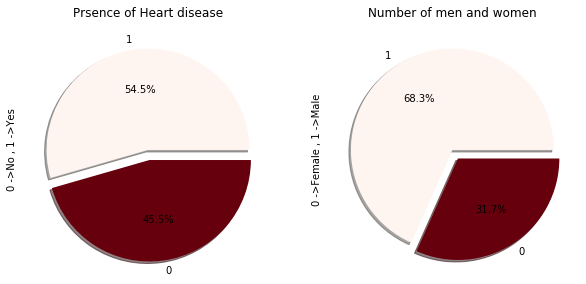

In [10]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Prsence of Heart disease')
df['target'].value_counts().plot.pie(explode=[0.0,0.1],autopct='%.1f%%',shadow=True, cmap='Reds',ax= ax[0])
ax[0].set_ylabel("0 ->No , 1 ->Yes")
plt.title('Number of men and women')
df['sex'].value_counts().plot.pie(explode=[0.0,0.1],autopct='%.1f%%',shadow=True, cmap='Reds',ax= ax[1])
ax[1].set_ylabel("0 ->Female , 1 ->Male");

- No null objects in our dataset.
- (228,14) is the new shape of the dataset.
- Classification on the basis of Target(Presence of Disease or Not).
- 54.5% people have the disease and 45.5% don't.
- 68.3% people are male and 31.7% are female.

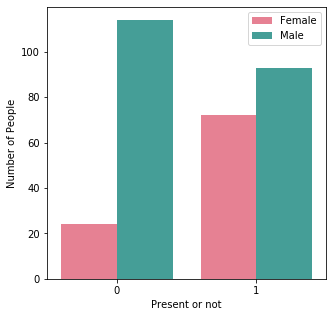

In [11]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'target',data = df,hue = 'sex',palette = 'husl')
plt.xlabel('Present or not')
plt.ylabel('Number of People')
plt.legend(['Female','Male']);

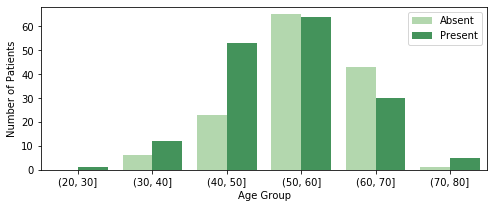

In [12]:
plt.figure(figsize = (8,3))
bins = [20,30,40,50,60,70,80]
df['age_bins']=pd.cut(df['age'], bins=bins)
g1=sns.countplot(x='age_bins',data=df ,hue='target',palette='Greens',linewidth=1)
plt.legend(['Absent','Present'])
plt.xlabel('Age Group')
plt.ylabel('Number of Patients');

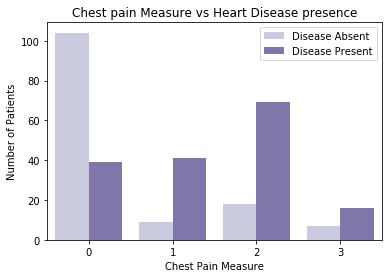

In [13]:
sns.countplot(x='cp',data=df,hue='target',palette='Purples',linewidth=1)
plt.title('Chest pain Measure vs Heart Disease presence')
plt.ylabel('Number of Patients')
plt.xlabel('Chest Pain Measure')
plt.legend(['Disease Absent','Disease Present']);

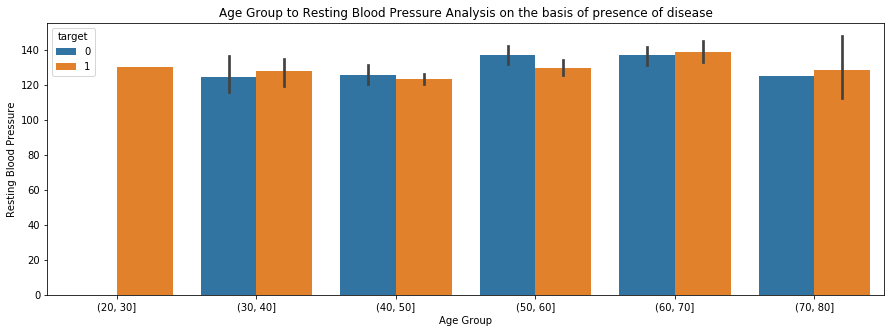

In [14]:
plt.figure(figsize = (15,5))
sns.barplot(x=df['age_bins'],y=df['trestbps'],hue = df['target'])
plt.xlabel('Age Group')
plt.ylabel('Resting Blood Pressure')
plt.title('Age Group to Resting Blood Pressure Analysis on the basis of presence of disease');

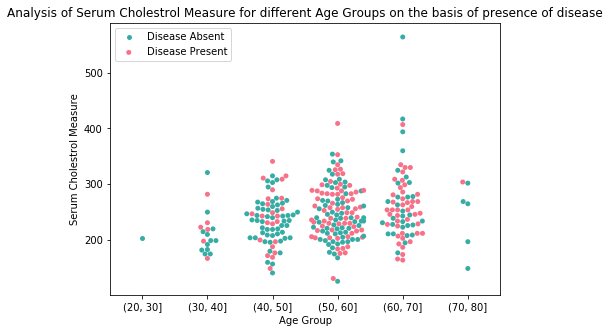

In [15]:
plt.figure(figsize = (7,5))
sns.swarmplot(x='age_bins',y= 'chol',data=df,hue='target',palette='husl')
plt.title('Analysis of Serum Cholestrol Measure for different Age Groups on the basis of presence of disease')
plt.xlabel('Age Group')
plt.ylabel('Serum Cholestrol Measure')
plt.legend(['Disease Absent','Disease Present']);

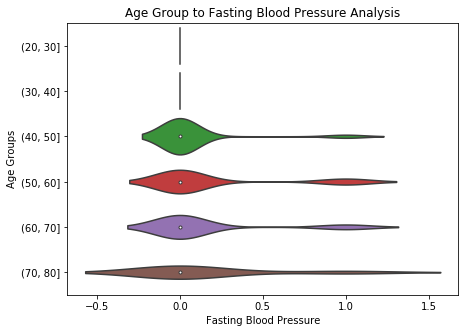

In [16]:
plt.figure(figsize = (7,5))
sns.violinplot(x=df['fbs'],y=df['age_bins'])
plt.xlabel('Fasting Blood Pressure')
plt.ylabel('Age Groups')
plt.title('Age Group to Fasting Blood Pressure Analysis');

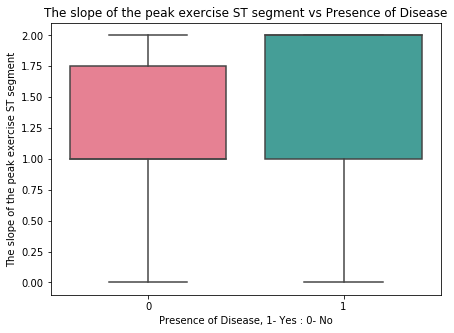

In [17]:
plt.figure(figsize = (7,5))
sns.boxplot(x='target',y= 'slope',data=df,palette='husl')
plt.title('The slope of the peak exercise ST segment vs Presence of Disease')
plt.xlabel('Presence of Disease, 1- Yes : 0- No')
plt.ylabel('The slope of the peak exercise ST segment');

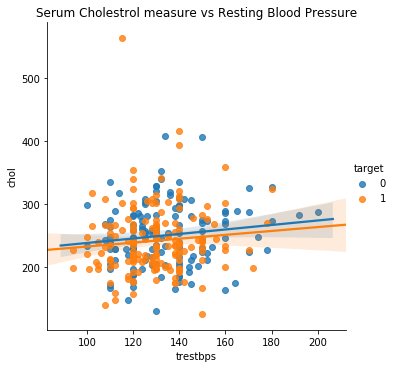

In [18]:
sns.lmplot(x="trestbps", y="chol",data=df,hue='target')
plt.title('Serum Cholestrol measure vs Resting Blood Pressure');

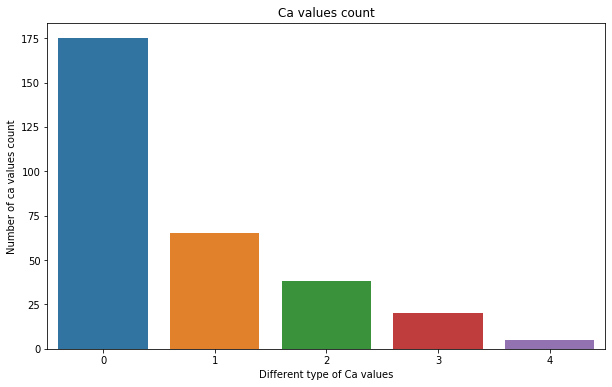

In [19]:
plt.figure(figsize=(10,6))
count= df['ca'].value_counts()
sns.barplot(x=count.index, y=count.values)
plt.ylabel("Number of ca values count")
plt.xlabel("Different type of Ca values")
plt.title("Ca values count");

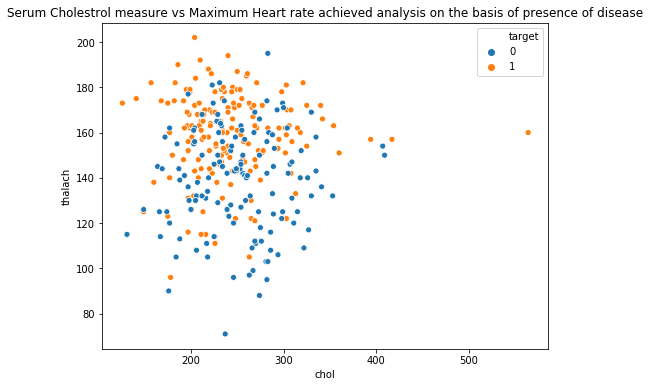

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.title('Serum Cholestrol measure vs Maximum Heart rate achieved analysis on the basis of presence of disease');

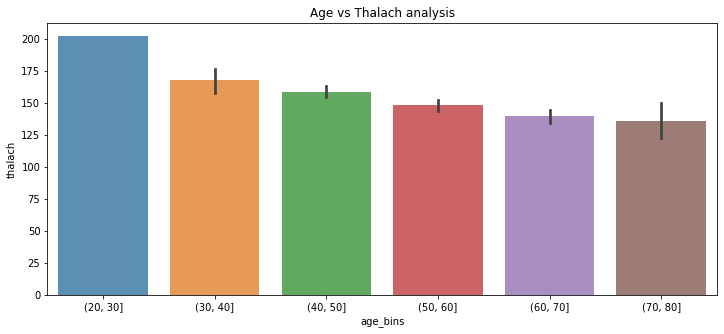

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['age_bins'],y=df['thalach'],data = df,alpha=0.8)
plt.title('Age vs Thalach analysis');

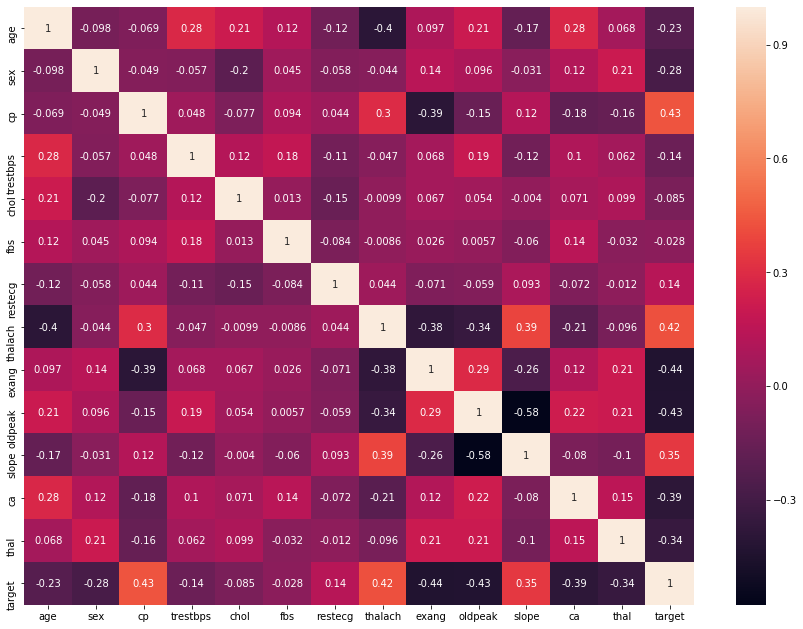

In [22]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot = True);

### Now to apply thinkstats2 and thinkplot

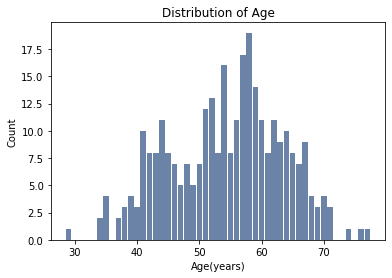

In [23]:
hist_age = thinkstats2.Hist(df['age'])
thinkplot.hist(hist_age)
plt.title('Distribution of Age')
thinkplot.Config(xlabel='Age(years)', ylabel='Count');

In [24]:
print('kurtosis of Age: {}'.format(kurtosis(df['age'])))
print('skewness of Age: {}'.format(skew(df['age'])))

kurtosis of Age: -0.55299857127345
skewness of Age: -0.2014596901125439


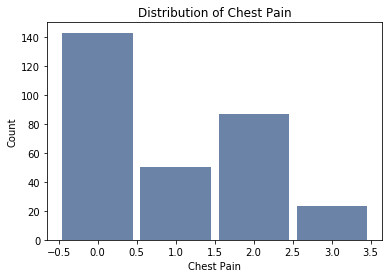

In [25]:
hist_cp = thinkstats2.Hist(df['cp'])
thinkplot.hist(hist_cp)
plt.title('Distribution of Chest Pain')
thinkplot.Config(xlabel='Chest Pain', ylabel='Count');

In [26]:
print('kurtosis of Chest Pain: {}'.format(kurtosis(df['cp'])))
print('skewness of Chest Pain: {}'.format(skew(df['cp'])))

kurtosis of Chest Pain: -1.1932109350319449
skewness of Chest Pain: 0.4823293961332623


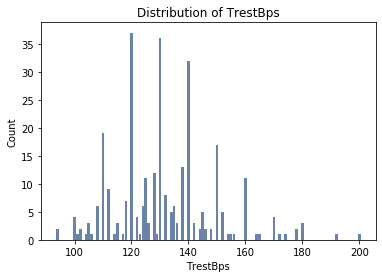

In [27]:
hist_bps = thinkstats2.Hist(df['trestbps'])
thinkplot.hist(hist_bps)
plt.title('Distribution of TrestBps')
thinkplot.Config(xlabel='TrestBps', ylabel='Count');

In [28]:
print('kurtosis of TrestBps: {}'.format(kurtosis(df['trestbps'])))
print('skewness of TrestBps: {}'.format(skew(df['trestbps'])))

kurtosis of TrestBps: 0.8940569555069118
skewness of TrestBps: 0.7102300604861443


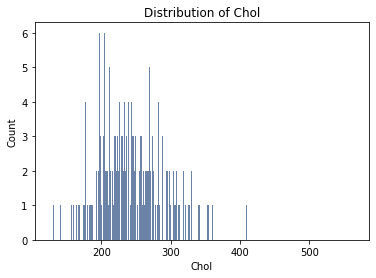

In [29]:
hist_chol = thinkstats2.Hist(df['chol'])
thinkplot.hist(hist_chol)
plt.title('Distribution of Chol')
thinkplot.Config(xlabel='Chol', ylabel='Count');

In [30]:
print('kurtosis of Cholestrol: {}'.format(kurtosis(df['chol'])))
print('skewness of Cholestrol: {}'.format(skew(df['chol'])))

kurtosis of Cholestrol: 4.411682119729873
skewness of Cholestrol: 1.1377326187082244


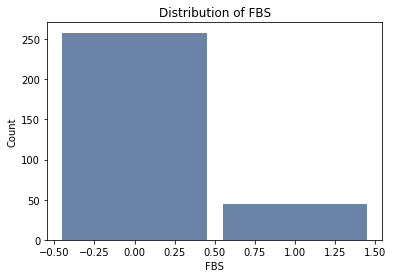

In [31]:
hist_fbs = thinkstats2.Hist(df['fbs'])
thinkplot.hist(hist_fbs)
plt.title('Distribution of FBS')
thinkplot.Config(xlabel='FBS', ylabel='Count');

In [32]:
print('kurtosis of FBS: {}'.format(kurtosis(df['fbs'])))
print('skewness of FBS: {}'.format(skew(df['fbs'])))

kurtosis of FBS: 1.9077519379844965
skewness of FBS: 1.976803464683451


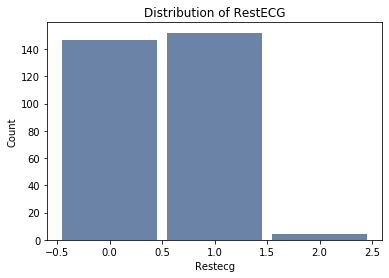

In [33]:
hist_ecg = thinkstats2.Hist(df['restecg'])
thinkplot.hist(hist_ecg)
plt.title('Distribution of RestECG')
thinkplot.Config(xlabel='Restecg', ylabel='Count');

In [34]:
print('kurtosis of restecg: {}'.format(kurtosis(df['restecg'])))
print('skewness of restecg: {}'.format(skew(df['restecg'])))

kurtosis of restecg: -1.3600274409622233
skewness of restecg: 0.1617165704075642


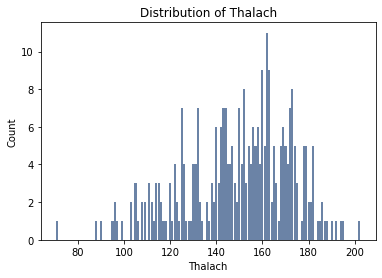

In [35]:
hist_th = thinkstats2.Hist(df['thalach'])
thinkplot.hist(hist_th)
plt.title('Distribution of Thalach')
thinkplot.Config(xlabel='Thalach', ylabel='Count');

In [36]:
print('kurtosis of thalach: {}'.format(kurtosis(df['thalach'])))
print('skewness of thalach: {}'.format(skew(df['thalach'])))

kurtosis of thalach: -0.08068888039194055
skewness of thalach: -0.5347455419075503


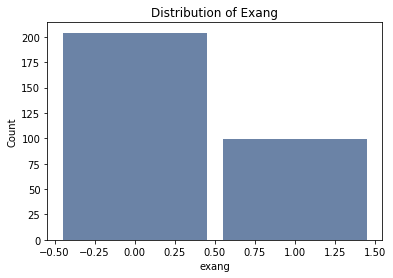

In [37]:
hist_ex = thinkstats2.Hist(df['exang'])
thinkplot.hist(hist_ex)
plt.title('Distribution of Exang')
thinkplot.Config(xlabel='exang', ylabel='Count');

In [38]:
print('kurtosis of exang: {}'.format(kurtosis(df['exang'])))
print('skewness of exang: {}'.format(skew(df['exang'])))

kurtosis of exang: -1.4540998217468801
skewness of exang: 0.7388505791113107


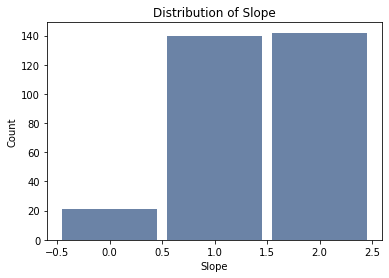

In [39]:
hist_sl = thinkstats2.Hist(df['slope'])
thinkplot.hist(hist_sl)
plt.title('Distribution of Slope')
thinkplot.Config(xlabel='Slope', ylabel='Count');

In [40]:
print('kurtosis of slope: {}'.format(kurtosis(df['slope'])))
print('skewness of slope: {}'.format(skew(df['slope'])))

kurtosis of slope: -0.6369501947346548
skewness of slope: -0.5057957274757736


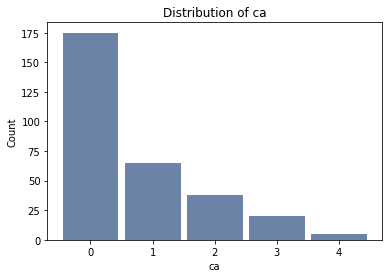

In [41]:
hist_ca = thinkstats2.Hist(df['ca'])
thinkplot.hist(hist_ca)
plt.title('Distribution of ca')
thinkplot.Config(xlabel='ca', ylabel='Count');

In [42]:
print('kurtosis of ca: {}'.format(kurtosis(df['ca'])))
print('skewness of ca: {}'.format(skew(df['ca'])))

kurtosis of ca: 0.8057311214832796
skewness of ca: 1.303925955673585


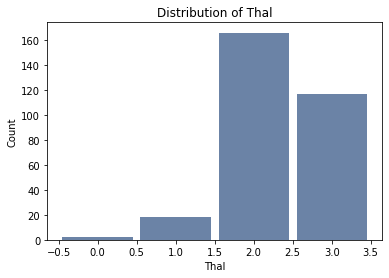

In [43]:
hist_thal = thinkstats2.Hist(df['thal'])
thinkplot.hist(hist_thal)
plt.title('Distribution of Thal')
thinkplot.Config(xlabel='Thal', ylabel='Count');

In [44]:
print('kurtosis of thal: {}'.format(kurtosis(df['thal'])))
print('skewness of thal: {}'.format(skew(df['thal'])))

kurtosis of thal: 0.2732845857908739
skewness of thal: -0.47435893118696904


### PMF

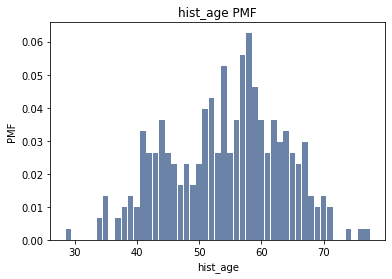

In [45]:
n = hist_age.Total()
pmf = hist_age.Copy()
for x, freq in hist_age.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_age', ylabel='PMF')
plt.title('hist_age PMF');

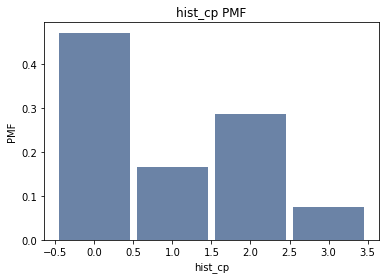

In [46]:
n = hist_cp.Total()
pmf = hist_cp.Copy()
for x, freq in hist_cp.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_cp', ylabel='PMF')
plt.title('hist_cp PMF');

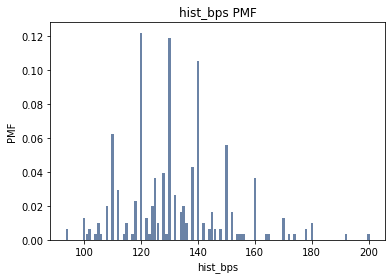

In [47]:
n = hist_bps.Total()
pmf = hist_bps.Copy()
for x, freq in hist_bps.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_bps', ylabel='PMF')
plt.title('hist_bps PMF');

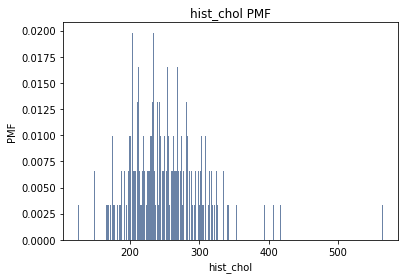

In [48]:
n = hist_chol.Total()
pmf = hist_chol.Copy()
for x, freq in hist_chol.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_chol', ylabel='PMF')
plt.title('hist_chol PMF');

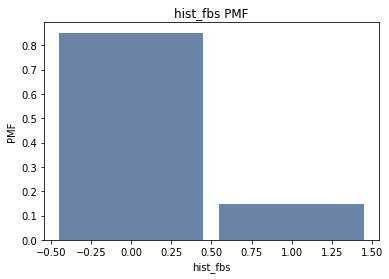

In [49]:
n = hist_fbs.Total()
pmf = hist_fbs.Copy()
for x, freq in hist_fbs.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_fbs', ylabel='PMF')
plt.title('hist_fbs PMF');

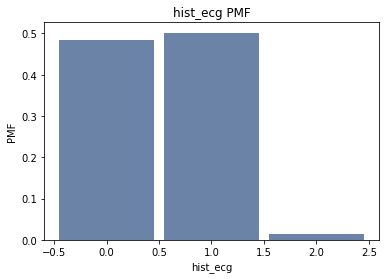

In [50]:
n = hist_ecg.Total()
pmf = hist_ecg.Copy()
for x, freq in hist_ecg.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_ecg', ylabel='PMF')
plt.title('hist_ecg PMF');

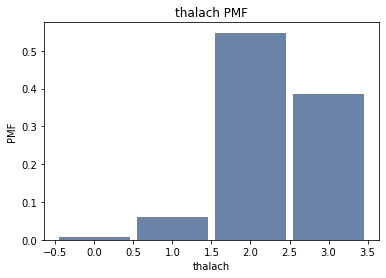

In [51]:
n = hist_thal.Total()
pmf = hist_thal.Copy()
for x, freq in hist_thal.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='thalach', ylabel='PMF')
plt.title('thalach PMF');

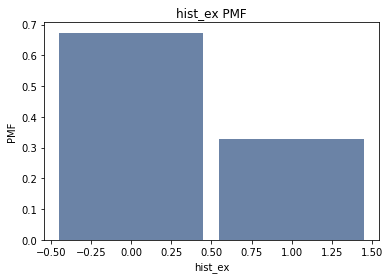

In [52]:
n = hist_ex.Total()
pmf = hist_ex.Copy()
for x, freq in hist_ex.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_ex', ylabel='PMF')
plt.title('hist_ex PMF');

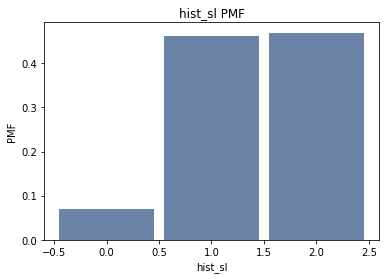

In [53]:
n = hist_sl.Total()
pmf = hist_sl.Copy()
for x, freq in hist_sl.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_sl', ylabel='PMF')
plt.title('hist_sl PMF');

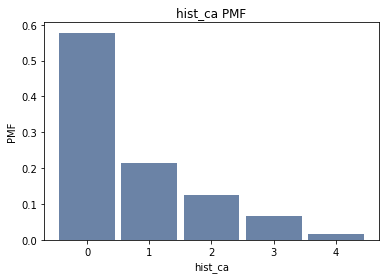

In [54]:
n = hist_ca.Total()
pmf = hist_ca.Copy()
for x, freq in hist_ca.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_ca', ylabel='PMF')
plt.title('hist_ca PMF');

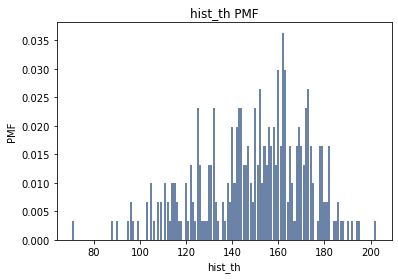

In [55]:
n = hist_th.Total()
pmf = hist_th.Copy()
for x, freq in hist_th.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_th', ylabel='PMF')
plt.title('hist_th PMF');

### CDF

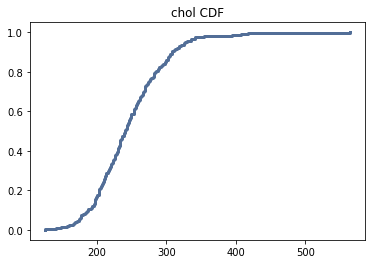

In [56]:
chol_cdf = thinkstats2.Cdf(df['chol'])
thinkplot.Cdf(chol_cdf)
plt.title('chol CDF');

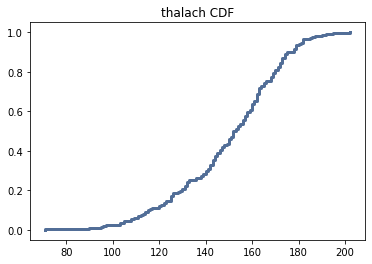

In [57]:
thalach_cdf = thinkstats2.Cdf(df['thalach'])
thinkplot.Cdf(thalach_cdf)
plt.title('thalach CDF');

In [58]:
df.drop('age_bins',axis= 1,inplace = True)

### PDF

In [60]:
present = df[df['target']==1]
cholestrol = present['chol']
mean, std = cholestrol.mean(), cholestrol.std()
mean, std

(242.23030303030302, 53.55287155453835)

In [61]:
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

0.0045183520042005555

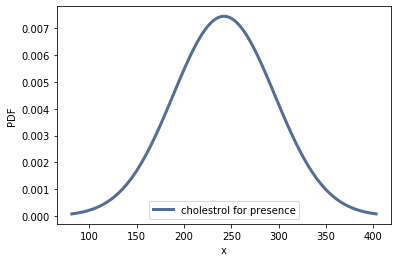

In [62]:
thinkplot.Pdf(pdf, label='cholestrol for presence')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [63]:
absent = df[df['target']==0]
cholestrol = absent['chol']
mean, std = cholestrol.mean(), cholestrol.std()
mean, std

(251.08695652173913, 49.45461360407158)

In [64]:
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

0.0048927836431265125

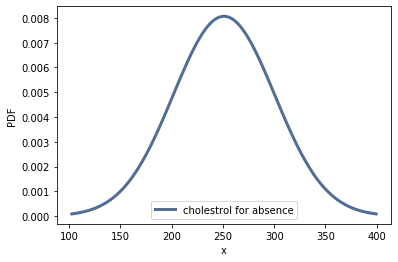

In [65]:
thinkplot.Pdf(pdf, label='cholestrol for absence')
thinkplot.Config(xlabel='x', ylabel='PDF')